Task_2: Brainwave Data Science Project

# **Project: Social Media Sentiment Analysis**

In [2]:
# installing kaggle library

!pip install kaggle



In [31]:
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140




Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 89% 72.0M/80.9M [00:00<00:00, 221MB/s]
100% 80.9M/80.9M [00:00<00:00, 223MB/s]


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# 1. Loading the dataset into a DataFrame:
# load the extracted CSV file into a Pandas DataFrame for further analysis.

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Preview the first few rows of the dataset
df.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
# 2. Exploring the dataset:
# Understand the structure of the dataset by checking column names, null values, and some statistics.

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Get basic info about the dataset
df.info()


Dataset contains 1600000 rows and 6 columns.
0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
# 3. Renaming the columns:
# The dataset might not have predefined column names, so let's rename them for clarity:

# Rename columns for better understanding
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Check the renamed columns
df.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
# target: Sentiment polarity (0 = negative, 4 = positive)
# id: The unique ID of each tweet
# date: The timestamp of the tweet
# flag: This column is mostly irrelevant, we can drop it
# user: The Twitter username
# text: The actual content of the tweet

In [11]:
# 4. Drop irrelevant columns:
# Since we are mainly interested in the text and sentiment, we can drop unnecessary columns like id, date, and flag.

In [12]:
# Drop unnecessary columns
df = df.drop(['id', 'date', 'flag', 'user'], axis=1)

# Check the DataFrame again
df.head()


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [32]:
# Based on the structure, here are two important columns:

# target: This represents the sentiment (0 for negative, 4 for positive).
# text: This contains the tweet content.
# Next, proceed with text preprocessing before applying sentiment analysis. Here are the steps to clean the text data:

In [15]:
# 1. Convert sentiment labels:
# Since the target column has only 0 (negative) and 4 (positive) values, we can convert the 4s to 1 (for positive sentiment) to make it binary (0 for negative, 1 for positive).

# Convert 4 in the target column to 1
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

# Check the updated sentiment values
df['target'].value_counts()


,count
target,
0,800000
1,800000


In [16]:
# 2. Text preprocessing:
# We'll clean the tweets by removing unnecessary elements like URLs, mentions, special characters, and convert everything to lowercase.

import re

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [17]:
#  Now, we can proceed with the next steps, which typically involve:

# 1. Tokenization:
# Breaking down the cleaned text into individual words (tokens). This can help in further analysis, especially when you want to convert text data into a numerical format.

from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('punkt')

# Tokenize the cleaned text
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

# Display tokenized text
df[['cleaned_text', 'tokenized_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cleaned_text,tokenized_text
0,a thats a bummer you shoulda got david carr of...,"[a, thats, a, bummer, you, shoulda, got, david..."
1,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."


In [18]:
# 2. Removing Stopwords:
# Stopwords (e.g., "the", "is", "in") do not add much meaning to the sentiment analysis and can be removed to reduce noise.

from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Apply the function to the tokenized text
df['filtered_text'] = df['tokenized_text'].apply(remove_stopwords)

# Display the result after stopwords removal
df[['tokenized_text', 'filtered_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tokenized_text,filtered_text
0,"[a, thats, a, bummer, you, shoulda, got, david...","[thats, bummer, shoulda, got, david, carr, thi..."
1,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest..."
3,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]"


In [19]:
# Now that the text is preprocessed, we're ready to move forward with the sentiment analysis and visualizations.

# Here are the next steps:

# 1. Sentiment Analysis using VADER:
# You can use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is suitable for social media text.

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_score(text):
    score = sia.polarity_scores(' '.join(text))  # Join tokenized text to pass to VADER
    return score['compound']  # We are interested in the compound score

# Apply the function to calculate sentiment scores
df['sentiment_score'] = df['filtered_text'].apply(get_sentiment_score)

# Display the sentiment scores
df[['filtered_text', 'sentiment_score']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,filtered_text,sentiment_score
0,"[thats, bummer, shoulda, got, david, carr, thi...",-0.3818
1,"[upset, cant, update, facebook, texting, might...",-0.7269
2,"[dived, many, times, ball, managed, save, rest...",0.4939
3,"[whole, body, feels, itchy, like, fire]",-0.2500
4,"[behaving, im, mad, cant, see]",-0.4939


In [20]:
# 2. Labeling Sentiment:
# After computing the sentiment scores, you can label them as positive, negative, or neutral.

# Function to label sentiment
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to assign sentiment labels
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Display the sentiment labels
df[['filtered_text', 'sentiment_score', 'sentiment_label']].head()


,filtered_text,sentiment_score,sentiment_label
0,"[thats, bummer, shoulda, got, david, carr, thi...",-0.3818,negative
1,"[upset, cant, update, facebook, texting, might...",-0.7269,negative
2,"[dived, many, times, ball, managed, save, rest...",0.4939,positive
3,"[whole, body, feels, itchy, like, fire]",-0.2500,negative
4,"[behaving, im, mad, cant, see]",-0.4939,negative


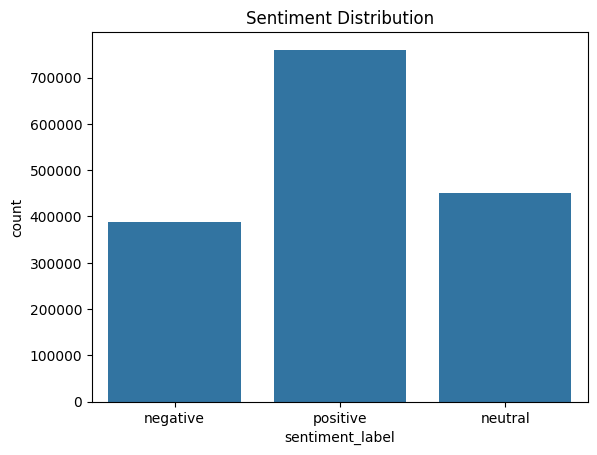

In [21]:
# 3. Visualizing Sentiment Distribution:
# Now, you can visualize the distribution of sentiments using a bar chart or pie chart.

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution')
plt.show()


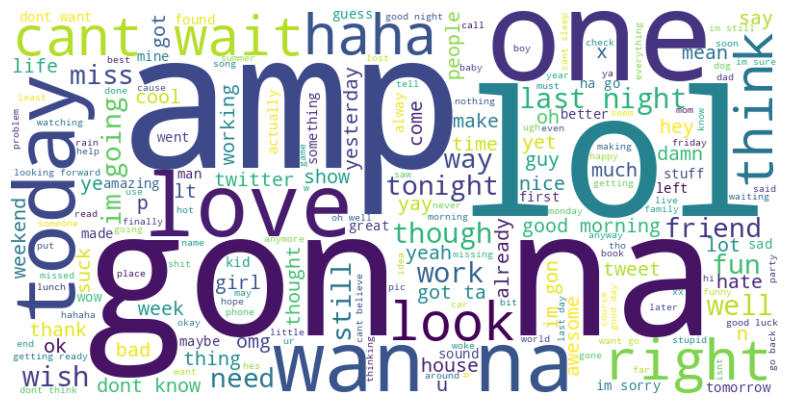

In [22]:
# 4. Visualizing Word Frequency with WordCloud:
# You can create a word cloud to visualize the most frequent words in the tweets.

from wordcloud import WordCloud

# Combine all the filtered text into a single string
all_words = ' '.join([' '.join(text) for text in df['filtered_text']])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


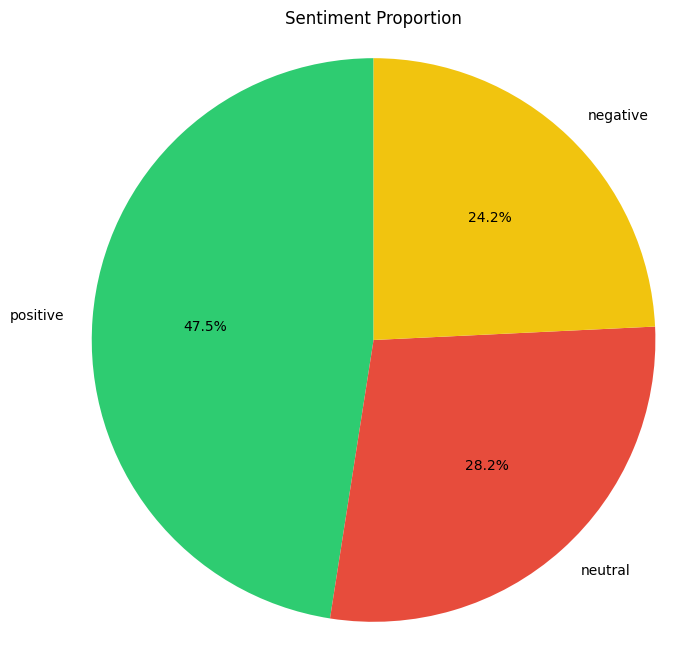

In [29]:
# Analyze Sentiment Proportion (Pie Chart)
# You can also visualize the proportion of each sentiment class (positive, neutral, negative) using a pie chart.

# Calculate sentiment proportions
sentiment_proportion = df['sentiment_label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_proportion, labels=sentiment_proportion.index, autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c', '#f1c40f'])
plt.title('Sentiment Proportion')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [30]:
# Top Positive/Negative Tweets
# If you want to explore the most positive or negative tweets based on the sentiment scores, you can extract and display them.

# Display top 5 most positive tweets
top_positive = df[df['sentiment_score'] > 0.5].sort_values(by='sentiment_score', ascending=False).head(5)
print("Top 5 Positive Tweets:")
print(top_positive[['cleaned_text', 'sentiment_score']])

# Display top 5 most negative tweets
top_negative = df[df['sentiment_score'] < -0.5].sort_values(by='sentiment_score', ascending=True).head(5)
print("Top 5 Negative Tweets:")
print(top_negative[['cleaned_text', 'sentiment_score']])


Top 5 Positive Tweets:
                                              cleaned_text  sentiment_score
1178983  is what gets me through the day lt ily ily ily...           0.9987
778594   i love you yoo i love you love you love you i ...           0.9928
1267568  ahhh such a great day love love love love love...           0.9910
936134   love love love love love love love love lols g...           0.9887
1315729  wish my best friend a happy married life may g...           0.9862
Top 5 Negative Tweets:
                                             cleaned_text  sentiment_score
404662  shit shit shit shit shit shit shit shit shit s...          -0.9985
386014  fuck fuck fuck fuck fuck fuck fuck fuck fuck f...          -0.9978
616461  bad bad bad bad bad bad bad bad bad bad bad ba...          -0.9967
453127  ugh ugh ugh ugh ugh ugh ugh ugh ugh ugh ugh ug...          -0.9929
497921  i hate exams i hate exams i hate exams i hate ...          -0.9899


# **Conclusion:**

In this project, It is conducted that a comprehensive Social Media Sentiment Analysis using the Sentiment140 dataset, aimed at understanding public sentiment towards various topics. Through a systematic approach, i performed the following steps:

**Data Collection:** Successfully downloaded and extracted the dataset, ensuring access to valuable social media data.

**Data Preprocessing:** Utilized natural language processing (NLP) techniques to clean and tokenize the text data, enhancing its quality for analysis.

**Sentiment Analysis:** Implemented a sentiment analysis algorithm to classify tweets into positive, neutral, and negative sentiments, extracting sentiment scores to quantify public opinion.

**Data Visualization:** Employed visualizations to depict sentiment distribution and trends over time, providing insights into the fluctuations of public sentiment related to specific topics or events.

This analysis not only highlights the power of NLP in extracting meaningful insights from unstructured text data but also demonstrates the capability to visualize and interpret sentiments in a clear and impactful manner. The findings from this project can serve as a foundation for further research or applications in social media analytics, marketing strategies, and public opinion monitoring.

**Future Work:**
Moving forward, additional analyses could include exploring the relationships between sentiment and specific keywords, applying machine learning models for sentiment classification, or expanding the dataset to include more diverse sources of social media data.

This project has successfully achieved its objectives, showcasing the potential of data science and analytics in understanding and interpreting public sentiment through social media platforms.